In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def read_data(path):

  train_path=path+"/train"
  test_path=path+"/test"
  validation_path=path+"/val"

  train_data,test_data,val_data = [],[],[]
  tr_out,test_out,val_out = [],[],[]
  
  for i in os.listdir(train_path):

      if i != ".DS_Store":
          for j in os.listdir(train_path+"/"+i):
              train_data.append(cv2.imread(train_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              tr_out.append(i)

          for j in os.listdir(test_path+"/"+i):
              test_data.append(cv2.imread(test_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              test_out.append(i)

          for j in os.listdir(validation_path+"/"+i):
              val_data.append(cv2.imread(validation_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              val_out.append(i)
    
  train_data, test_data, val_data = np.array(train_data), np.array(test_data), np.array(val_data)
  tr_out, test_out, val_out = np.array(list(map(int, tr_out))), np.array(list(map(int, test_out))), np.array(list(map(int, val_out)))

  return train_data, test_data, val_data, tr_out, test_out, val_out

In [4]:
path = "C:/Users/Ankit Mehra/Downloads/Group_5/Group_5"
train_data,test_data,val_data,tr_out,test_out,val_out = read_data(path)

In [5]:
train_data.shape

(11385, 28, 28)

In [6]:
train_data = train_data/255
test_data = test_data/255
val_data = val_data/255
train_data.shape

(11385, 28, 28)

In [7]:
labels=[0,1,2,4,7]

# Architechture for Autoencoder for one hidden layer with 64 neuron 

In [8]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(64,activation='sigmoid')(x)

# Encoder model for getting compressed representation of image
encoder1 = keras.Model(x_in,encoder_out,name="encoder")

decoder_ip = keras.layers.Dense(784,activation='linear')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.001,decay = 1e-6)

# Autoencoder model for getting reconstructed image
Autoencoder1 = keras.Model(x_in,decoder_op,name="Autoencoder1")
Autoencoder1.summary()


Model: "Autoencoder1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0448 - accuracy: 0.6418 - val_loss: 0.0281 - val_accuracy: 0.6523
Epoch 2/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0233 - accuracy: 0.6554 - val_loss: 0.0197 - val_accuracy: 0.6573
Epoch 3/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.6585 - val_loss: 0.0156 - val_accuracy: 0.6592
Epoch 4/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.6597 - val_loss: 0.0133 - val_accuracy: 0.6600
Epoch 5/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.6604 - val_loss: 0.0119 - val_accuracy: 0.6605
Epoch 6/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0113 - accuracy: 0.6607 - val_loss: 0.0110 - val_accuracy: 0.6607
Epoch 7/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.6609 - val_loss: 0.0103 - val_accuracy: 0.6609

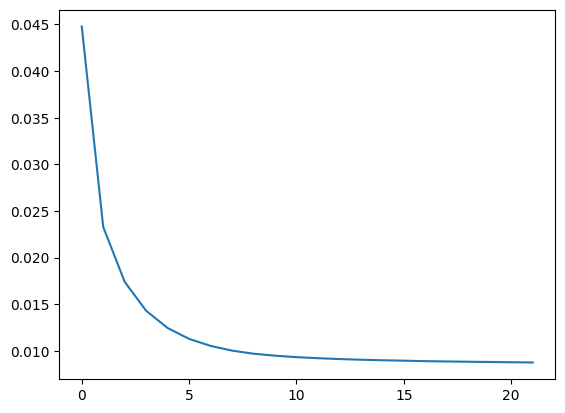

In [9]:
# callback for define stopping criteria as consicutive difference between error is less that 0.0001
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)

# compile the model for adam optimizer and accuracy matrics and loss as MSE
Autoencoder1.compile(optimizer,loss="mse",metrics=['accuracy'])
history = Autoencoder1.fit(train_data,train_data,epochs=100,callbacks=[callback], validation_data=(val_data, val_data))
plt.plot(history.history['loss'])


In [10]:
tr_loss,mse_tr=Autoencoder1.evaluate(train_data,train_data)
val_loss,mse_val=Autoencoder1.evaluate(val_data,val_data)
ts_loss,mse_ts=Autoencoder1.evaluate(test_data,test_data)
print(tr_loss)
print(val_loss)
print(ts_loss)

119/119 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.6609
0.008712642826139927
0.008868223056197166
0.00889952015131712


1/1 [==============================] - 0s 78ms/step


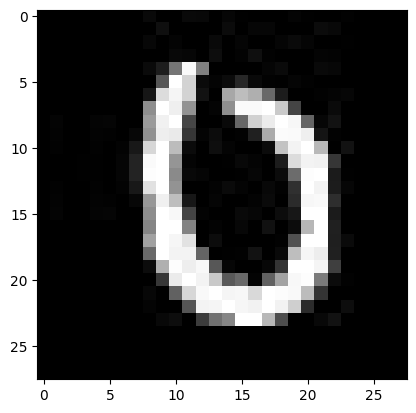

In [11]:
# predict reconstructed image with use of Autoencoder model
model_op64 = Autoencoder1.predict([test_data[1].reshape(-1,28,28,1)])
#original Image from dataset
plt.imshow(test_data[1],cmap="gray")

In [12]:
#reshape the vector into image
model_op64=model_op64.reshape(28,28)

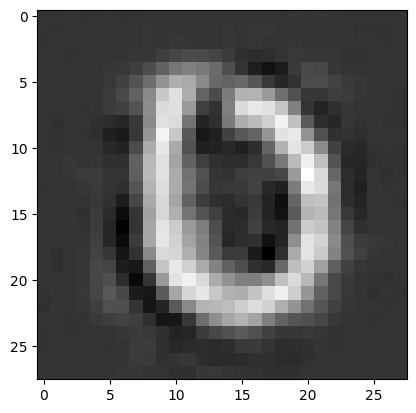

In [13]:
# reconstructed image of original image which predicted by Autoencoder
plt.imshow(model_op64,cmap="gray")

In [14]:
encoded_train_64 = encoder1.predict(train_data)
encoded_val_64 = encoder1.predict(val_data)
encoded_test_64 = encoder1.predict(test_data)
print(encoded_train_64.shape)
print(encoded_val_64.shape)
print(encoded_test_64.shape)

119/119 [==============================] - 0s 813us/step
(11385, 64)
(3795, 64)
(3795, 64)


# Original and reconstructed image for each class in architecture 1


1/1 [==============================] - 0s 16ms/step


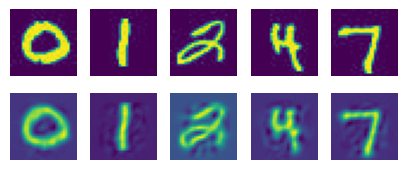

In [15]:
rand = [118,3437,6127,8363, 9141] # random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(train_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder1.predict([train_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Validation Data 

1/1 [==============================] - 0s 12ms/step


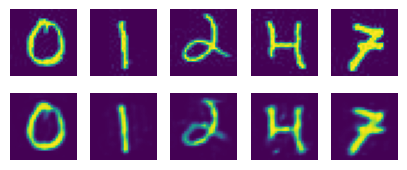

In [56]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(val_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder1.predict([val_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Test Data

1/1 [==============================] - 0s 18ms/step


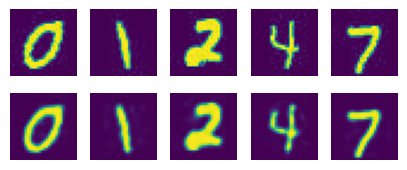

In [57]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(test_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder1.predict([test_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Architechture for Autoencoder for one hidden layer with 32 neuron 

In [18]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(32,activation='sigmoid')(x)
encoder_2 = keras.Model(x_in,encoder_out,name="encoder")

decoder_ip = keras.layers.Dense(784,activation='sigmoid')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.001,decay = 1e-6)

Autoencoder2 = keras.Model(x_in,decoder_op,name="Autoencoder2")
Autoencoder2.summary()

Model: "Autoencoder2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.6213 - val_loss: 0.0662 - val_accuracy: 0.6269
Epoch 2/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.6274 - val_loss: 0.0658 - val_accuracy: 0.6271
Epoch 3/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.6274 - val_loss: 0.0657 - val_accuracy: 0.6273
Epoch 4/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0655 - accuracy: 0.6274 - val_loss: 0.0657 - val_accuracy: 0.6273
Epoch 5/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.6277 - val_loss: 0.0642 - val_accuracy: 0.6280
Epoch 6/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0631 - accuracy: 0.6288 - val_loss: 0.0622 - val_accuracy: 0.6288
Epoch 7/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.6297 - val_loss: 0.0598 - val_accuracy: 0.6301

Epoch 58/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.6455 - val_loss: 0.0369 - val_accuracy: 0.6453
Epoch 59/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.6455 - val_loss: 0.0369 - val_accuracy: 0.6453
Epoch 60/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.6455 - val_loss: 0.0368 - val_accuracy: 0.6454


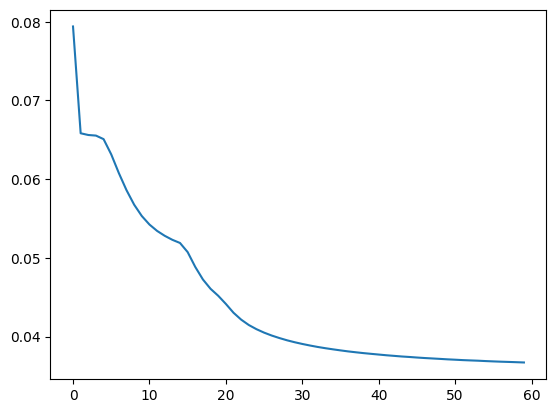

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
Autoencoder2.compile(optimizer,loss="mse",metrics=['accuracy'])
history2 = Autoencoder2.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
plt.plot(history2.history['loss'])

In [20]:
tr_loss,mse_tr=Autoencoder2.evaluate(train_data,train_data)
val_loss,mse_val=Autoencoder2.evaluate(val_data,val_data)
ts_loss,mse_ts=Autoencoder2.evaluate(test_data,test_data)
print(tr_loss)
print(val_loss)
print(ts_loss)

119/119 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.6453
0.0366586335003376
0.03682982921600342
0.03685280680656433


1/1 [==============================] - 0s 64ms/step


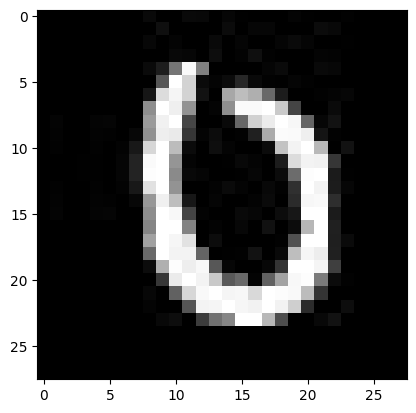

In [21]:
model_op32 = Autoencoder2.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")

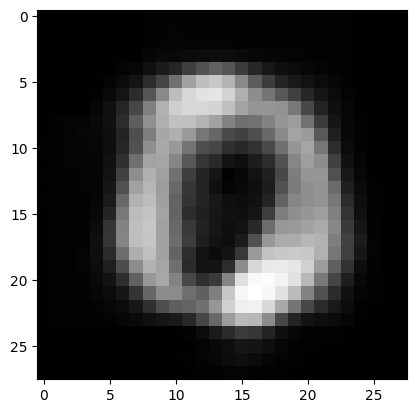

In [22]:
model_op32=model_op32.reshape(28,28)
plt.imshow(model_op32,cmap="gray")

In [23]:
encoded_train_32 = encoder_2.predict(train_data)
encoded_val_32 = encoder_2.predict(val_data)
encoded_test_32 = encoder_2.predict(test_data)
print(encoded_train_32.shape)
print(encoded_val_32.shape)
print(encoded_test_32.shape)

119/119 [==============================] - 0s 614us/step
(11385, 32)
(3795, 32)
(3795, 32)


# Original and reconstructed image for each class in architecture 2


1/1 [==============================] - 0s 15ms/step


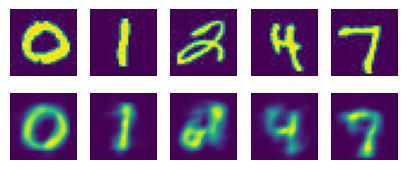

In [53]:
rand = [118,3437,6127,8363, 9141] # random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(train_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder2.predict([train_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Validation 

1/1 [==============================] - 0s 31ms/step


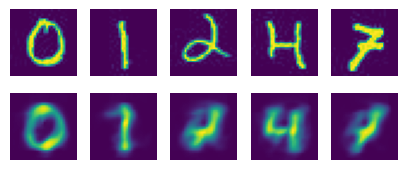

In [58]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(val_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder2.predict([val_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Test 

1/1 [==============================] - 0s 13ms/step


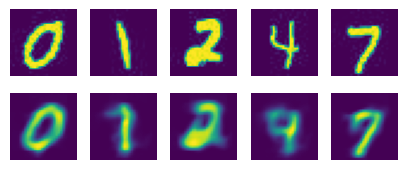

In [59]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(test_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder2.predict([test_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Architechture for Autoencoder for one hidden layer with 256 neuron 

In [27]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(256,activation='sigmoid')(x)
encoder_3 = keras.Model(x_in,encoder_out,name="encoder_3")

decoder_ip = keras.layers.Dense(784,activation='sigmoid')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.001,decay = 1e-6)


Autoencoder3 = keras.Model(x_in,decoder_op,name="Autoencoder3")
Autoencoder3.summary()

Model: "Autoencoder3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.6400 - val_loss: 0.0287 - val_accuracy: 0.6520
Epoch 2/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.6552 - val_loss: 0.0184 - val_accuracy: 0.6572
Epoch 3/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0156 - accuracy: 0.6585 - val_loss: 0.0134 - val_accuracy: 0.6593
Epoch 4/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0116 - accuracy: 0.6599 - val_loss: 0.0103 - val_accuracy: 0.6602
Epoch 5/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0092 - accuracy: 0.6606 - val_loss: 0.0085 - val_accuracy: 0.6606
Epoch 6/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0076 - accuracy: 0.6610 - val_loss: 0.0071 - val_accuracy: 0.6609
Epoch 7/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.6612 - val_loss: 0.0062 - val_accuracy: 0.6611

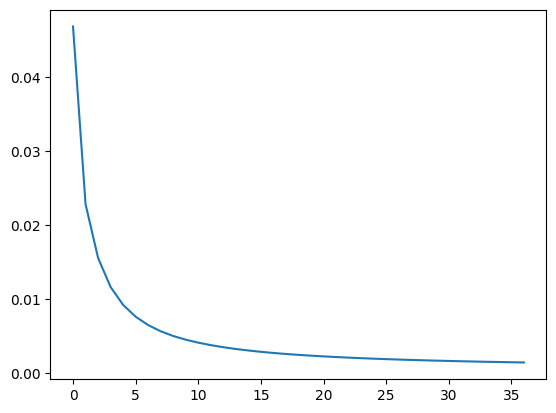

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
Autoencoder3.compile(optimizer,loss="mse",metrics=['accuracy'])
history3 = Autoencoder3.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
plt.plot(history3.history['loss'])

In [29]:
tr_loss,mse_tr=Autoencoder3.evaluate(train_data,train_data)
val_loss,mse_val=Autoencoder3.evaluate(val_data,val_data)
ts_loss,mse_ts=Autoencoder3.evaluate(test_data,test_data)
print(tr_loss)
print(val_loss)
print(ts_loss)

119/119 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.6615
0.0013709188206121325
0.0018454254604876041
0.0018702700035646558


1/1 [==============================] - 0s 64ms/step


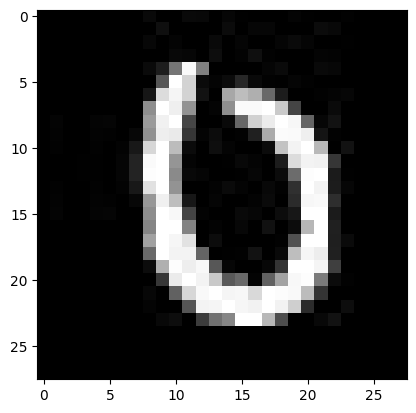

In [30]:
model_op256 = Autoencoder3.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")

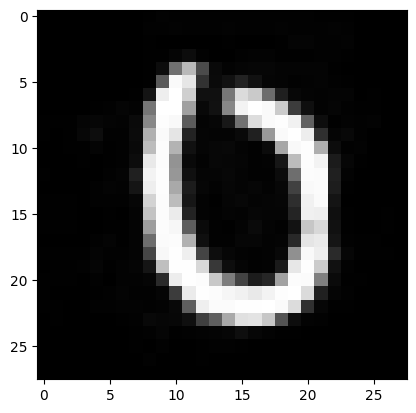

In [31]:
model_op256=model_op256.reshape(28,28)
plt.imshow(model_op256,cmap="gray")

In [32]:
encoded_train_256 = encoder_3.predict(train_data)
encoded_val_256 = encoder_3.predict(val_data)
encoded_test_256 = encoder_3.predict(test_data)
print(encoded_train_256.shape)
print(encoded_val_256.shape)
print(encoded_test_256.shape)

119/119 [==============================] - 0s 740us/step
(11385, 256)
(3795, 256)
(3795, 256)


In [33]:
weight1=encoder_3.layers[0].get_weights()
weight1

[]

# Original and reconstructed image for each class in architecture 3


1/1 [==============================] - 0s 19ms/step


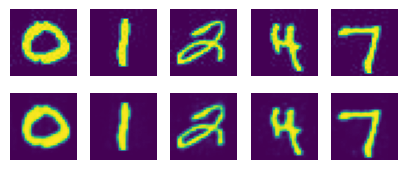

In [54]:
rand = [118,3437,6127,8363, 9141] # random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(train_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder3.predict([train_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Validation 

1/1 [==============================] - 0s 19ms/step


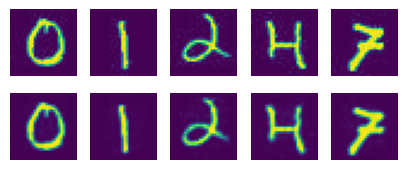

In [60]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(val_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder3.predict([val_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Test

1/1 [==============================] - 0s 18ms/step


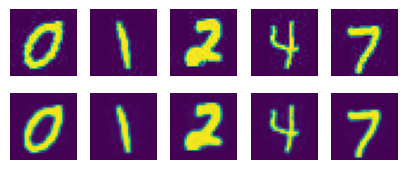

In [61]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(test_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder3.predict([test_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Architechture for Autoencoder for one hidden layer with 128 neuron 


In [37]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out = keras.layers.Dense(128,activation='sigmoid')(x)
encoder_4 = keras.Model(x_in,encoder_out,name="encoder_3")

decoder_ip = keras.layers.Dense(784,activation='sigmoid')(encoder_out)

decoder_op = keras.layers.Reshape((28,28,1))(decoder_ip)
optimizer = keras.optimizers.Adam(learning_rate = 0.001,decay = 1e-6)

Autoencoder4 = keras.Model(x_in,decoder_op,name="Autoencoder4")
Autoencoder4.summary()

Model: "Autoencoder4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.6310 - val_loss: 0.0428 - val_accuracy: 0.6428
Epoch 2/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.6478 - val_loss: 0.0303 - val_accuracy: 0.6510
Epoch 3/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0267 - accuracy: 0.6531 - val_loss: 0.0238 - val_accuracy: 0.6546
Epoch 4/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0213 - accuracy: 0.6560 - val_loss: 0.0195 - val_accuracy: 0.6567
Epoch 5/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.6577 - val_loss: 0.0163 - val_accuracy: 0.6582
Epoch 6/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0150 - accuracy: 0.6588 - val_loss: 0.0140 - val_accuracy: 0.6590
Epoch 7/100
356/356 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.6595 - val_loss: 0.0122 - val_accuracy: 0.6596

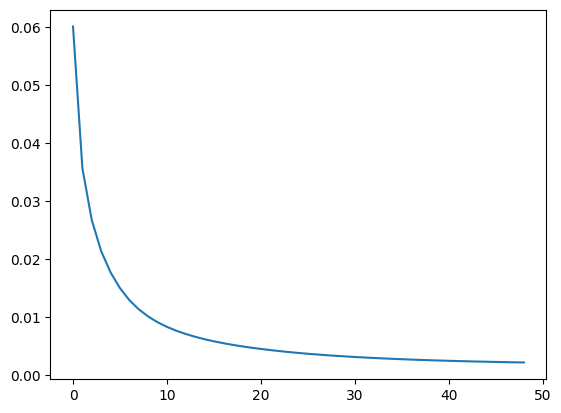

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=3)
Autoencoder4.compile(optimizer,loss="mse",metrics=['accuracy'])
history4 = Autoencoder4.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
plt.plot(history4.history['loss'])

In [39]:
tr_loss,mse_tr=Autoencoder4.evaluate(train_data,train_data)
val_loss,mse_val=Autoencoder4.evaluate(val_data,val_data)
ts_loss,mse_ts=Autoencoder4.evaluate(test_data,test_data)
print(tr_loss)
print(val_loss)
print(ts_loss)

119/119 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.6614
0.0020579041447490454
0.002624172018840909
0.0026433856692165136


1/1 [==============================] - 0s 56ms/step


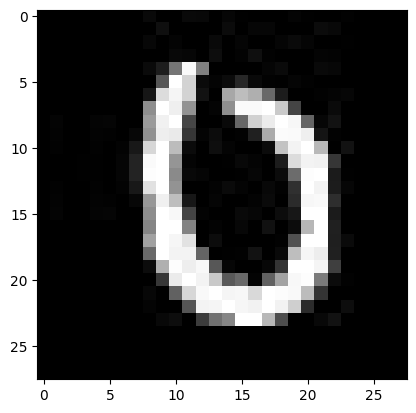

In [40]:
model_op100 = Autoencoder4.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")

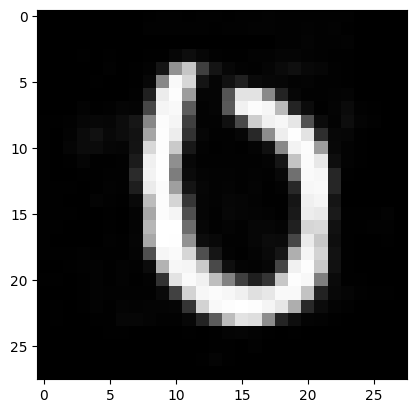

In [41]:
model_op100=model_op100.reshape(28,28)
plt.imshow(model_op100,cmap="gray")

In [42]:
encoded_train_128 = encoder_4.predict(train_data)
encoded_val_128 = encoder_4.predict(val_data)
encoded_test_128 = encoder_4.predict(test_data)
print(encoded_train_128.shape)
print(encoded_val_128.shape)
print(encoded_test_128.shape)

119/119 [==============================] - 0s 737us/step
(11385, 128)
(3795, 128)
(3795, 128)


# Original and reconstructed image for each class in architecture 4

1/1 [==============================] - 0s 17ms/step


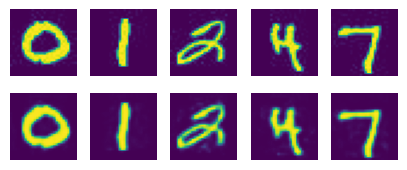

In [55]:
rand = [118,3437,6127,8363, 9141] # random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(train_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder4.predict([train_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Val Data

1/1 [==============================] - 0s 12ms/step


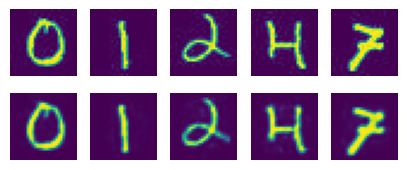

In [62]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(val_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder4.predict([val_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Test Data

1/1 [==============================] - 0s 17ms/step


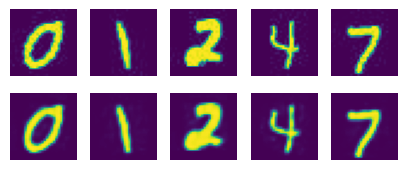

In [63]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(test_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder4.predict([test_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Classification task using inputs from autoencoders

# Different autoencoders input for model 1 -> 512-256-256

In [121]:
# Model of FCNN with 3 hidden layers for classification 
model51 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model51.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [122]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model51.fit(encoded_train_64, tr_out, epochs=10000, callbacks=callback)


Epoch 1/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.9669 - accuracy: 0.6033
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1737 - accuracy: 0.9475
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1359 - accuracy: 0.9594
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1219 - accuracy: 0.9635
Epoch 5/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9650
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1064 - accuracy: 0.9671
Epoch 7/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9685
Epoch 8/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9695
Epoch 9/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9702
Epoch 10/10000
356/356 [==============================] - 1s 2ms/step - l

In [123]:
tr_out.shape

(11385,)

In [124]:
# For getting validation loss and accuracy.
loss_train_64, mse_train_64 = model51.evaluate(encoded_train_64, tr_out)
loss_val_64, mse_val_64 = model51.evaluate(encoded_val_64, val_out)
loss_test_64, mse_test_64 = model51.evaluate(encoded_test_64, test_out)

119/119 [==============================] - 0s 913us/step - loss: 0.0914 - accuracy: 0.9813


119/119 [==============================] - 0s 977us/step


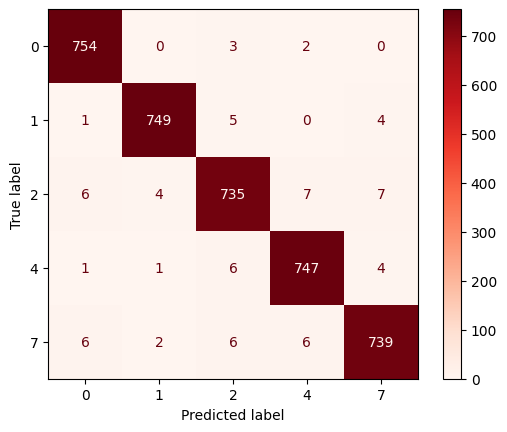

In [125]:
predictions = model51.predict(encoded_test_64,verbose=1)
p_class = np.argmax(predictions, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm=confusion_matrix(test_out, p_class)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
display.plot(cmap=plt.cm.Reds)
plt.show()

In [131]:
# Model of FCNN with 3 hidden layers for classification 
model52 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model52.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [132]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained2 = model52.fit(encoded_train_32, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 2ms/step - loss: 1.3810 - accuracy: 0.3765
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.4039 - accuracy: 0.8583
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8817
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.2982 - accuracy: 0.8991
Epoch 5/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.9029
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.2815 - accuracy: 0.9060
Epoch 7/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.9130
Epoch 8/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.2551 - accuracy: 0.9147
Epoch 9/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.2535 - accuracy: 0.9165
Epoch 10/10000
356/356 [==============================] - 1s 2ms/step - l

356/356 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9736
Epoch 158/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9751
Epoch 159/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9715
Epoch 160/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9722
Epoch 161/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9744
Epoch 162/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9744
Epoch 163/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9734
Epoch 164/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9755
Epoch 165/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9727
Epoch 166/10000
356/356 [==============================] - 1s 2ms/step 

In [133]:
# For getting validation loss and accuracy.
loss_train_32, mse_train_32 = model52.evaluate(encoded_train_32, tr_out)
loss_val_32, mse_val_32 = model52.evaluate(encoded_val_32, val_out)
loss_test_32, mse_test_32 = model52.evaluate(encoded_test_32, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.9365


119/119 [==============================] - 0s 915us/step


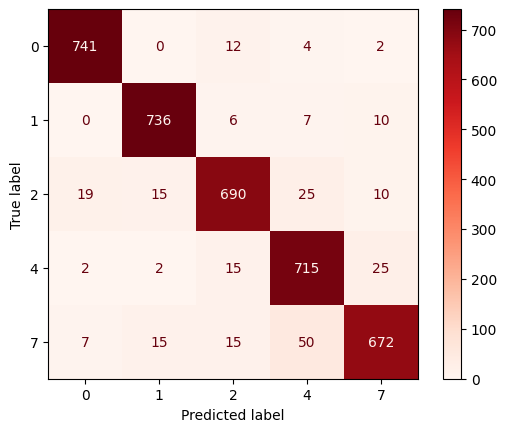

In [134]:
predictions2 = model52.predict(encoded_test_32,verbose=1)
p_class2 = np.argmax(predictions2, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm2=confusion_matrix(test_out, p_class2)
display=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=labels)
display.plot(cmap=plt.cm.Reds)
plt.show()

In [13]:
# Model of FCNN with 3 hidden layers for classification 
model53 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model53.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained3 = model53.fit(encoded_train_256, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.5663 - accuracy: 0.7946
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1215 - accuracy: 0.9634
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9696
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0876 - accuracy: 0.9736
Epoch 5/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9740
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9750
Epoch 7/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9767
Epoch 8/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.9796
Epoch 9/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9784
Epoch 10/10000
356/356 [==============================] - 1s 2ms/step - l

In [15]:
# For getting validation loss and accuracy.
loss_train_256, mse_train_256 = model53.evaluate(encoded_train_256, tr_out)
loss_val_256, mse_val_256 = model53.evaluate(encoded_val_256, val_out)
loss_test_256, mse_test_256 = model53.evaluate(encoded_test_256, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9874


119/119 [==============================] - 0s 930us/step


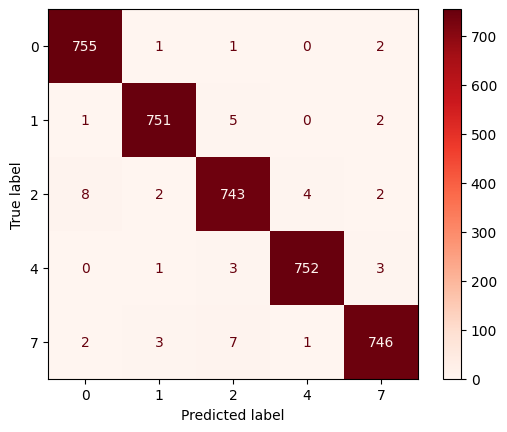

In [16]:
predictions3 = model53.predict(encoded_test_256,verbose=1)
p_class3 = np.argmax(predictions3, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm3=confusion_matrix(test_out, p_class3)
display=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=labels)
display.plot(cmap=plt.cm.Reds)
plt.show()

# Plot of weights from input layer to compressed layer

In [21]:
weight1=Autoencoder3.layers[0].get_weights()
weight1

[]

In [139]:
# Model of FCNN with 3 hidden layers for classification 
model54 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model54.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [140]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained4 = model54.fit(encoded_train_128, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.7610 - accuracy: 0.7053
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1461 - accuracy: 0.9557
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.9679
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9680
Epoch 5/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9704
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9717
Epoch 7/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9747
Epoch 8/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9747
Epoch 9/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9757
Epoch 10/10000
356/356 [==============================] - 1s 2ms/step - l

In [141]:
# For getting validation loss and accuracy.
loss_train_128, mse_train_128 = model54.evaluate(encoded_train_128, tr_out)
loss_val_128, mse_val_128 = model54.evaluate(encoded_val_128, val_out)
loss_test_128, mse_test_128 = model54.evaluate(encoded_test_128, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9813


119/119 [==============================] - 0s 873us/step


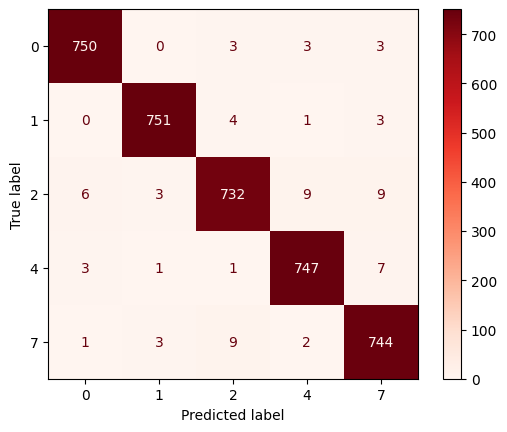

In [142]:
predictions4 = model54.predict(encoded_test_128,verbose=1)
p_class4 = np.argmax(predictions4, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm4=confusion_matrix(test_out, p_class4)
display=ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=labels)
display.plot(cmap=plt.cm.Reds)
plt.show()

# Different autoencoders input for model 2 -> 512-512-512

In [149]:
# Model of FCNN with 3 hidden layers for classification 
model61 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model61.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [150]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model61.fit(encoded_train_64, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.8717 - accuracy: 0.6379
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9465
Epoch 3/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1526 - accuracy: 0.9541
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1284 - accuracy: 0.9616
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9668
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1105 - accuracy: 0.9662
Epoch 7/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1108 - accuracy: 0.9670
Epoch 8/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1087 - accuracy: 0.9672
Epoch 9/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0981 - accuracy: 0.9694
Epoch 10/10000
356/356 [==============================] - 1s 3ms/step - l

In [151]:
loss_train_64, mse_train_64 = model51.evaluate(encoded_train_64, tr_out)
loss_val_64, mse_val_64 = model51.evaluate(encoded_val_64, val_out)
loss_test_64, mse_test_64 = model51.evaluate(encoded_test_64, test_out)

119/119 [==============================] - 0s 998us/step - loss: 0.0914 - accuracy: 0.9813


119/119 [==============================] - 0s 1ms/step


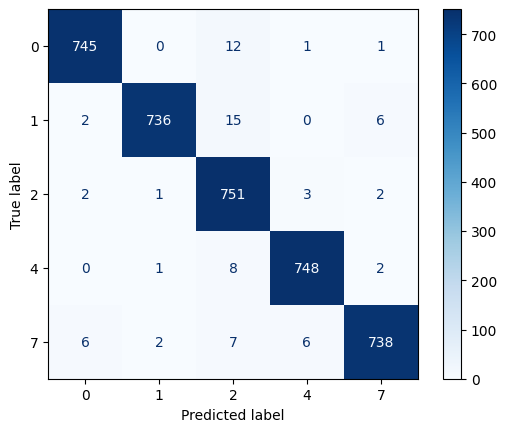

In [153]:
predictions = model61.predict(encoded_test_64,verbose=1)
p_class = np.argmax(predictions, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm=confusion_matrix(test_out, p_class)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [156]:
# Model of FCNN with 3 hidden layers for classification 
model62 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model62.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [157]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained2 = model62.fit(encoded_train_32, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 2s 3ms/step - loss: 1.3407 - accuracy: 0.3995
Epoch 2/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.8416
Epoch 3/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8820
Epoch 4/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8861
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.3227 - accuracy: 0.8896
Epoch 6/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.8990
Epoch 7/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.2840 - accuracy: 0.9050
Epoch 8/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.2732 - accuracy: 0.9063
Epoch 9/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.2643 - accuracy: 0.9107
Epoch 10/10000
356/356 [==============================] - 1s 3ms/step - l

356/356 [==============================] - 1s 3ms/step - loss: 0.0628 - accuracy: 0.9764
Epoch 158/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0632 - accuracy: 0.9772
Epoch 159/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9769
Epoch 160/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.9776
Epoch 161/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9773
Epoch 162/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0563 - accuracy: 0.9788
Epoch 163/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0588 - accuracy: 0.9786
Epoch 164/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0598 - accuracy: 0.9770
Epoch 165/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.9798
Epoch 166/10000
356/356 [==============================] - 1s 3ms/step 

In [158]:
# For getting validation loss and accuracy.
loss_train_32, mse_train_32 = model62.evaluate(encoded_train_32, tr_out)
loss_val_32, mse_val_32 = model62.evaluate(encoded_val_32, val_out)
loss_test_32, mse_test_32 = model62.evaluate(encoded_test_32, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.2327 - accuracy: 0.9452


119/119 [==============================] - 0s 1ms/step


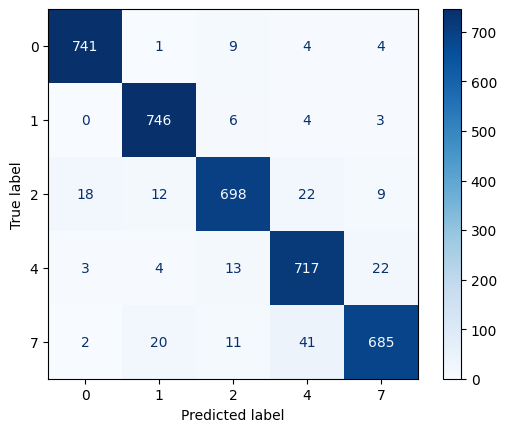

In [159]:
predictions2 = model62.predict(encoded_test_32,verbose=1)
p_class2 = np.argmax(predictions2, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm2=confusion_matrix(test_out, p_class2)
display=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [160]:
# Model of FCNN with 3 hidden layers for classification 
model63 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model63.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [161]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained3 = model63.fit(encoded_train_256, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 2s 3ms/step - loss: 0.5331 - accuracy: 0.7975
Epoch 2/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.1352 - accuracy: 0.9578
Epoch 3/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9685
Epoch 4/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0951 - accuracy: 0.9704
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0847 - accuracy: 0.9746
Epoch 6/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9742
Epoch 7/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9765
Epoch 8/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9778
Epoch 9/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 10/10000
356/356 [==============================] - 1s 3ms/step - l

In [162]:
# For getting validation loss and accuracy.
loss_train_256, mse_train_256 = model63.evaluate(encoded_train_256, tr_out)
loss_val_256, mse_val_256 = model63.evaluate(encoded_val_256, val_out)
loss_test_256, mse_test_256 = model63.evaluate(encoded_test_256, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9802


119/119 [==============================] - 0s 2ms/step


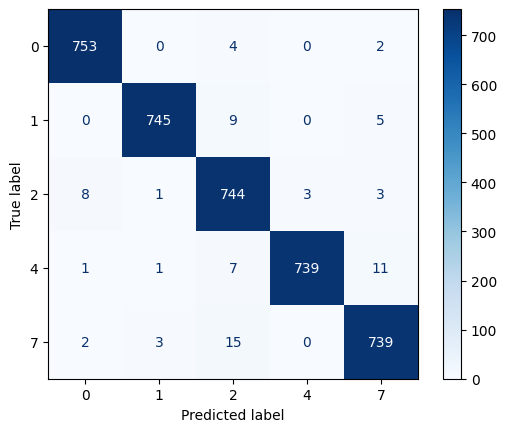

In [163]:
predictions3 = model63.predict(encoded_test_256,verbose=1)
p_class3 = np.argmax(predictions3, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm3=confusion_matrix(test_out, p_class3)
display=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [167]:
# Model of FCNN with 3 hidden layers for classification 
model64 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model64.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [168]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained4 = model64.fit(encoded_train_128, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.6712 - accuracy: 0.7304
Epoch 2/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1424 - accuracy: 0.9599
Epoch 3/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1221 - accuracy: 0.9627
Epoch 4/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1079 - accuracy: 0.9671
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1021 - accuracy: 0.9679
Epoch 6/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0995 - accuracy: 0.9690
Epoch 7/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0917 - accuracy: 0.9716
Epoch 8/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9750
Epoch 9/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9737
Epoch 10/10000
356/356 [==============================] - 1s 3ms/step - l

In [169]:
# For getting validation loss and accuracy.
loss_train_128, mse_train_128 = model64.evaluate(encoded_train_128, tr_out)
loss_val_128, mse_val_128 = model64.evaluate(encoded_val_128, val_out)
loss_test_128, mse_test_128 = model64.evaluate(encoded_test_128, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9834


119/119 [==============================] - 0s 1ms/step


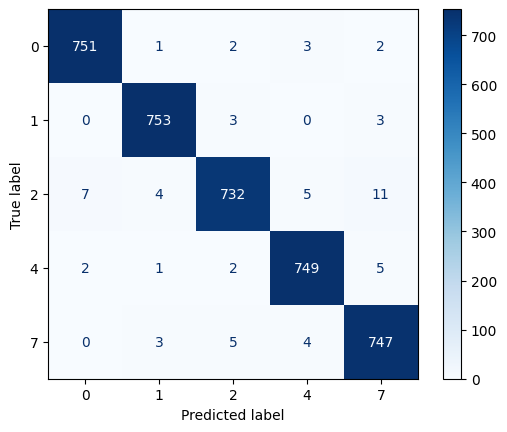

In [170]:
predictions4 = model64.predict(encoded_test_128,verbose=1)
p_class4 = np.argmax(predictions4, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm4=confusion_matrix(test_out, p_class4)
display=ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.show()